Hello everyone!

My main aim is to explore this dataset and find some interesting speciality in Data.

In this Notebook I'll show you an analysis of the most common incidents and their specialty. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly
plotly.offline.init_notebook_mode()
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import numpy as np
import seaborn as sns
import calendar
%matplotlib inline
df = pd.read_csv('../input/911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [2]:
reason = np.unique(df['title'])

In [3]:
reason.size

117

As you can see above, there are 117 reasons of 911-calls.

In [4]:
DATA = np.zeros((df.shape[0],6),dtype='O')
DATA[:,0] = df['lng'].values
DATA[:,1] = df['lat'].values
DATA[:,4] = df['title'].values
DATA[:,5] = df['twp'].values
for i in range(DATA.shape[0]):
    DATA[i,2] = df['timeStamp'].values[i][:10]
    DATA[i,3] = df['timeStamp'].values[i][10:]
    sp = DATA[i,3].split(':')
    DATA[i,3] = (int(sp[0])*3600 + int(sp[1])*60 + int(sp[2]))/3600

In [5]:
new_data = np.zeros(reason.size,dtype = 'O')
for i in range(reason.size):
    new_data[i] = DATA[np.where(DATA[:,4] == reason[i])]

In [6]:
week = np.array(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

In [7]:
for i in range(new_data.shape[0]):
    for j in range(new_data[i].shape[0]):
        w = np.array(new_data[i][j,2].split('-')).astype(int)
        new_data[i][j,0] = week[calendar.weekday(w[0],w[1],w[2])]

On plots below you can see dependence between day of the week and type of incident. I'am going to show you just the most common types of incidents. The most common types of incidents are those, which have more than 2000 calls. So, here it is:

Number of calls with EMS: ABDOMINAL PAINS 1705
Number of calls with EMS: CARDIAC EMERGENCY 5870
Number of calls with EMS: FALL VICTIM 5717
Number of calls with EMS: GENERAL WEAKNESS 1705
Number of calls with EMS: HEAD INJURY 3109
Number of calls with EMS: RESPIRATORY EMERGENCY 5901
Number of calls with EMS: SEIZURES 1922
Number of calls with EMS: SUBJECT IN PAIN 3177
Number of calls with EMS: SYNCOPAL EPISODE 2016
Number of calls with EMS: UNKNOWN MEDICAL EMERGENCY 2239
Number of calls with EMS: VEHICLE ACCIDENT 4660
Number of calls with Fire: FIRE ALARM 6552
Number of calls with Fire: VEHICLE ACCIDENT 1932
Number of calls with Traffic: DISABLED VEHICLE - 8976
Number of calls with Traffic: ROAD OBSTRUCTION - 3644
Number of calls with Traffic: VEHICLE ACCIDENT - 27147


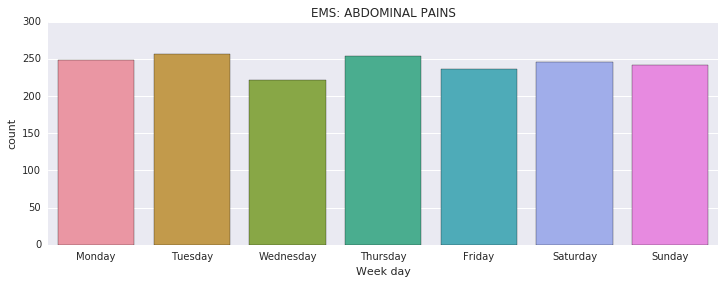

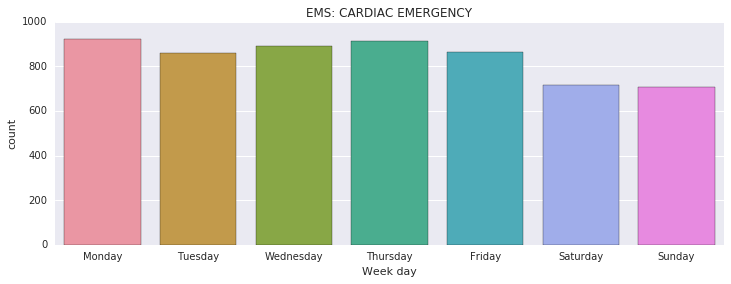

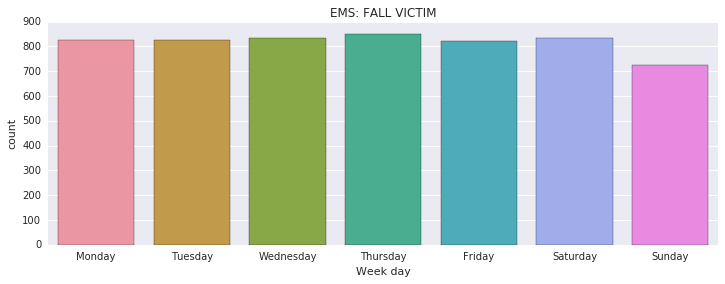

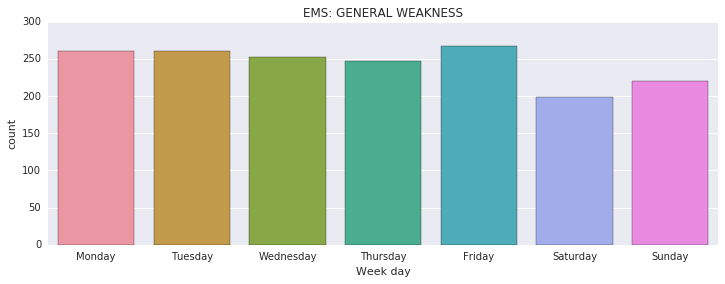

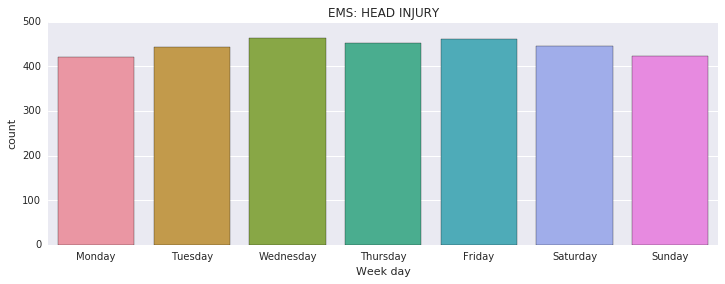

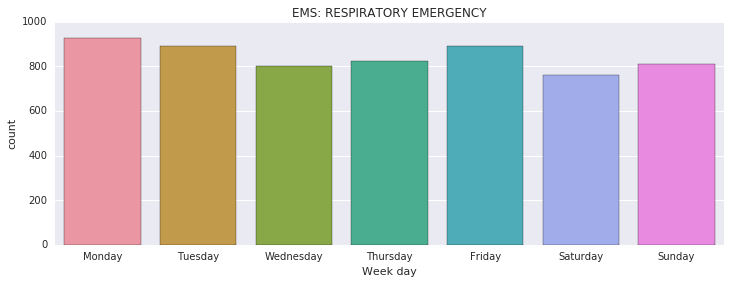

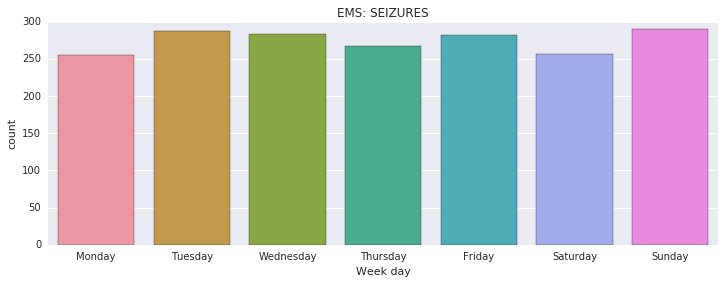

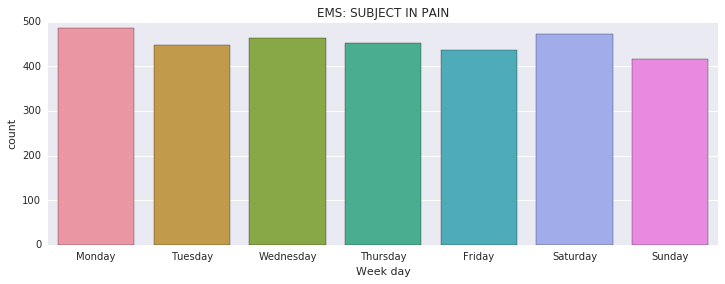

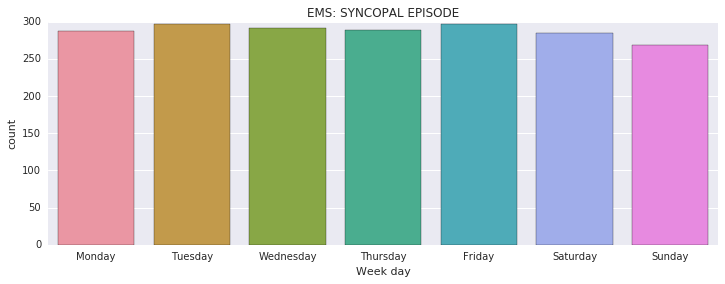

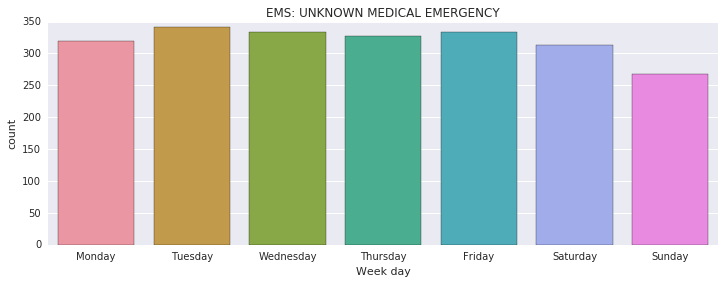

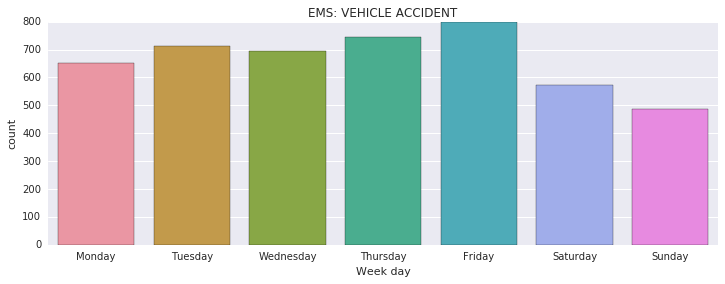

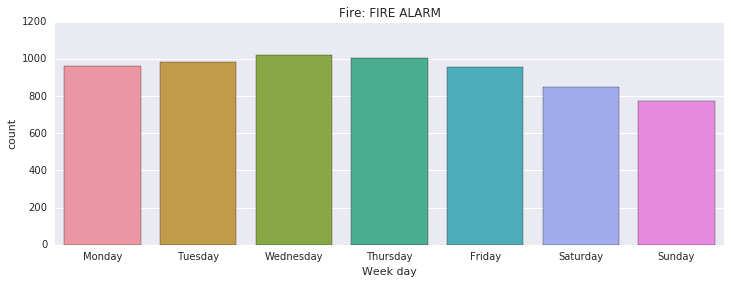

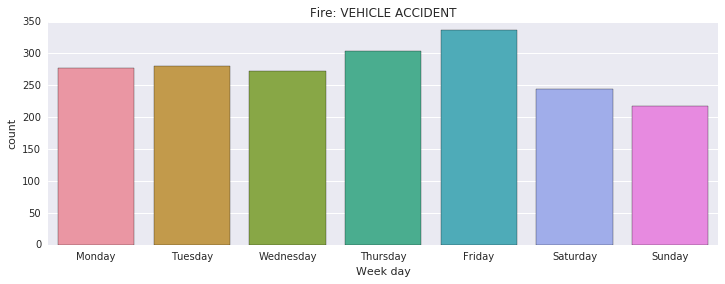

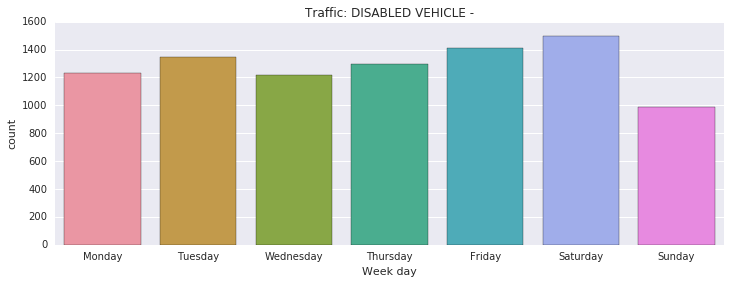

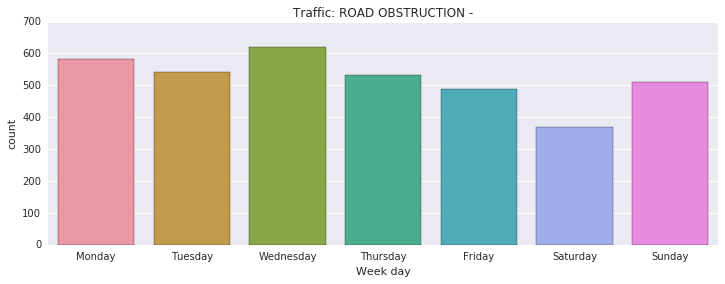

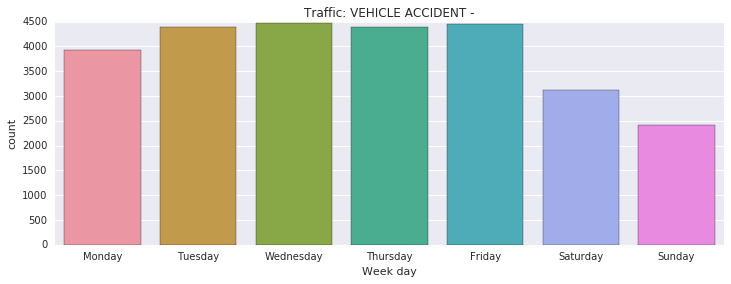

In [8]:
for i in range(reason.size):
    if new_data[i][:,3].size > 1700:
        sns.plt.figure(figsize=(12,4))
        sns.plt.title(new_data[i][0][-2])
        sns.plt.xlabel("Week day")
        sns.plt.ylabel(new_data[i][0][-2])
        print("Number of calls with " + new_data[i][0][-2] + " "+ str(new_data[i][:,3].size))
        sns.countplot((new_data[i][:,0]),order = week)

On plots below you can see dependence between the reason of 911-call and time of the day.

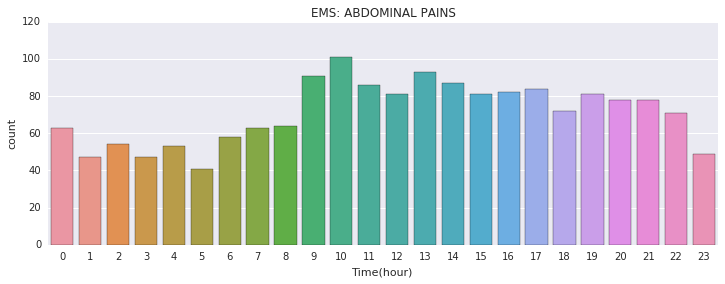

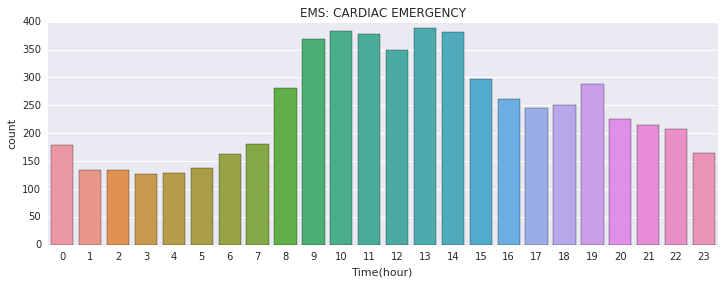

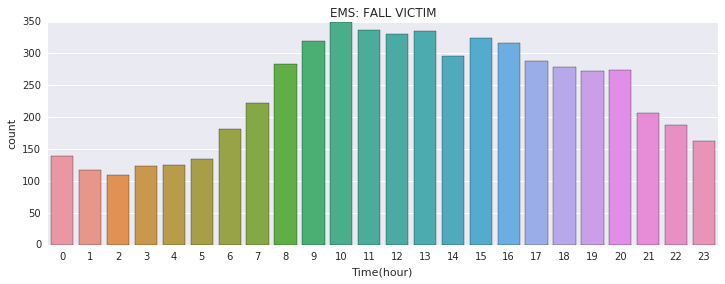

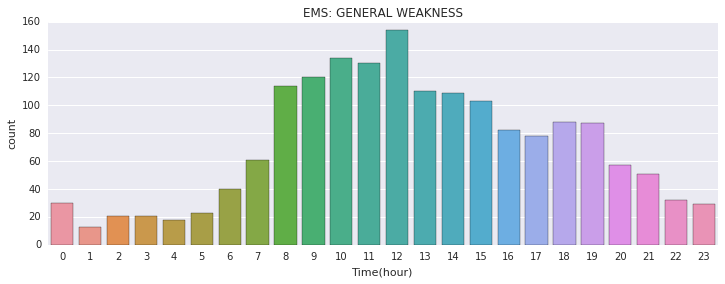

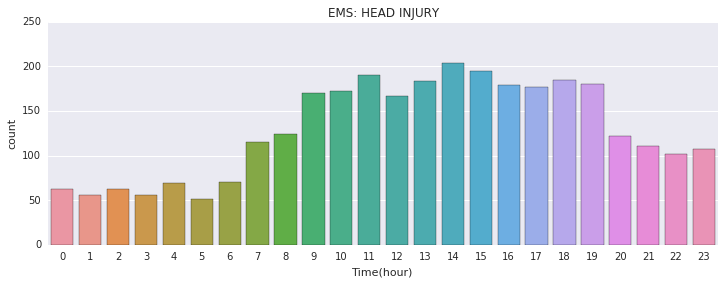

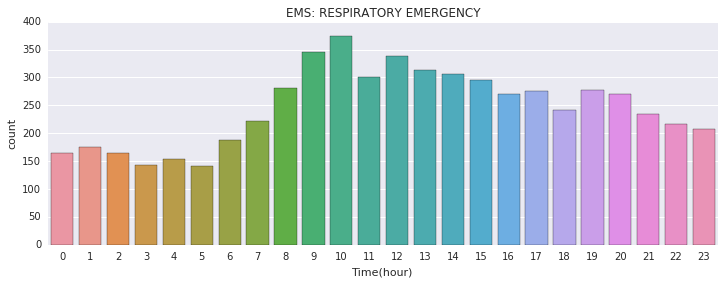

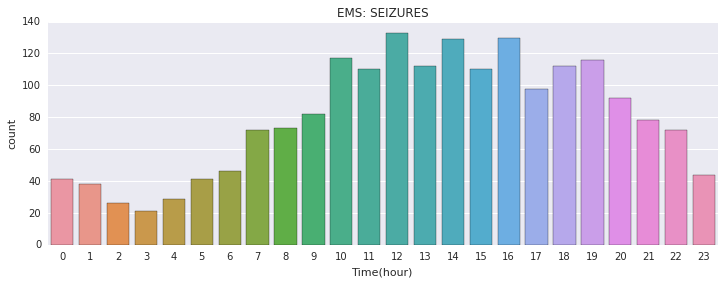

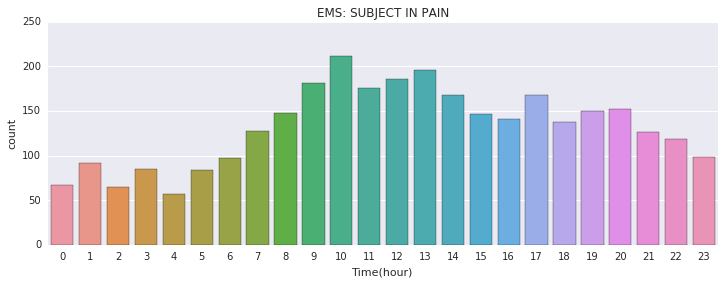

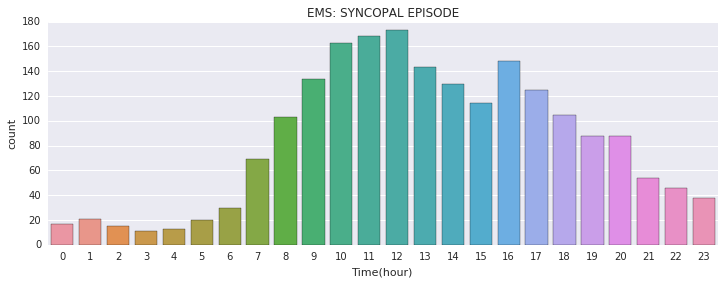

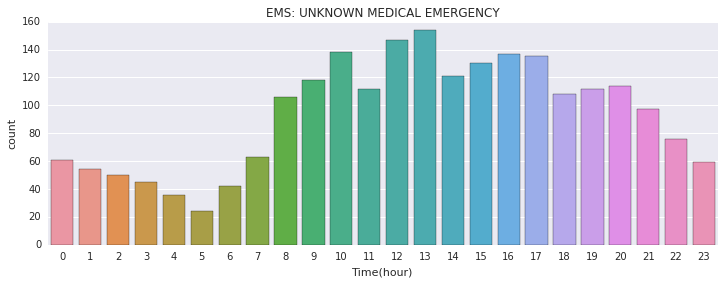

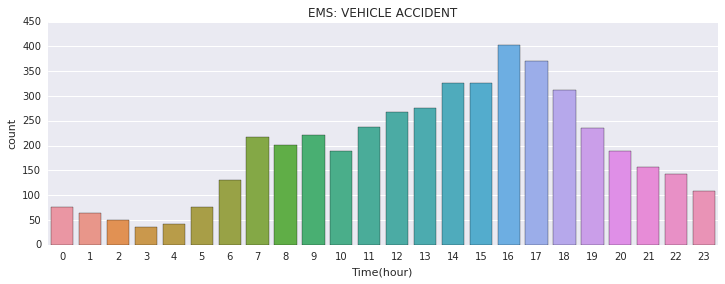

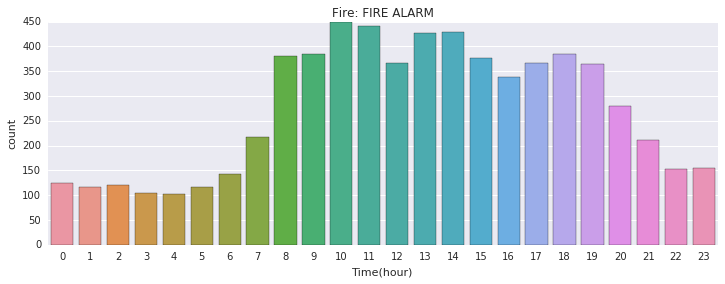

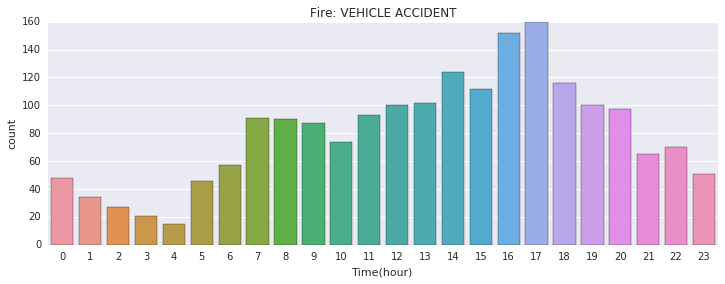

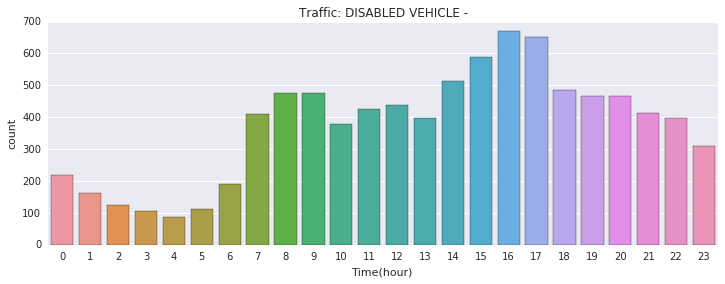

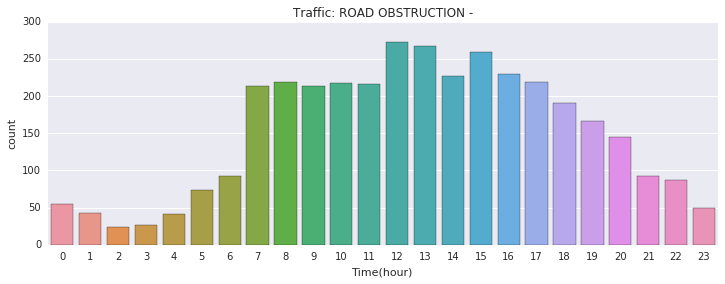

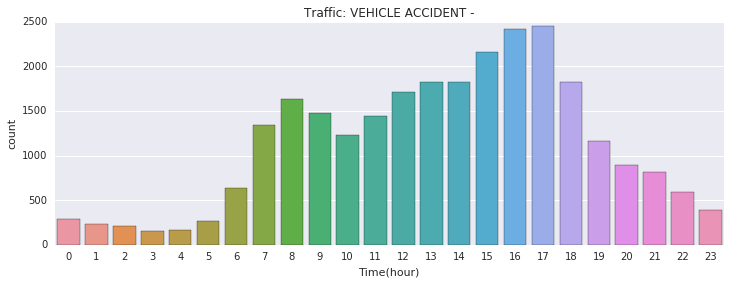

In [9]:
for i in range(reason.size):
    if new_data[i][:,3].size > 1700:
        sns.plt.figure(figsize=(12,4))
        sns.plt.title(new_data[i][0][-2])
        sns.plt.xlabel("Time(hour)")
        sns.plt.ylabel(new_data[i][0][-2])
        sns.plt.xlim(0,24)
        sns.countplot((new_data[i][:,3]).astype(int))

In [10]:
for i in range(DATA.shape[0]):
    DATA[i,2] = DATA[i,2][:-3]

In [11]:
for i in range(reason.size):
    new_data[i] = DATA[np.where(DATA[:,4] == reason[i])]

On plots below you can see dependence between the reason of 911-call and month.

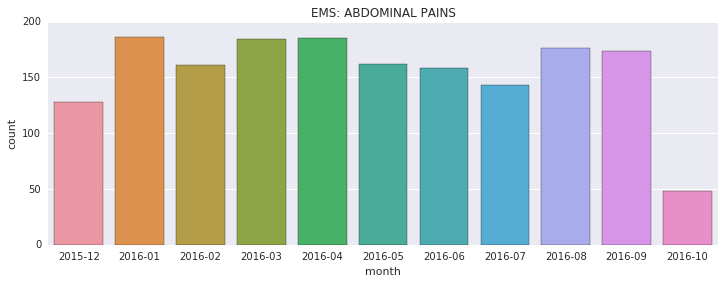

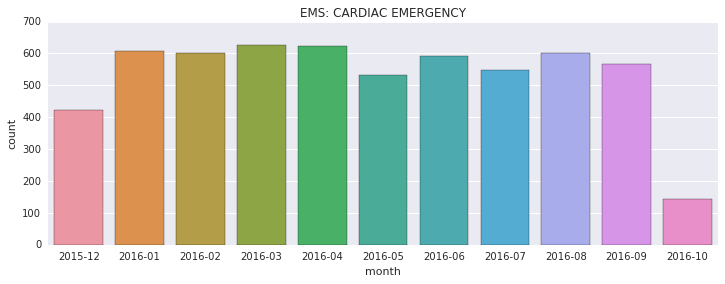

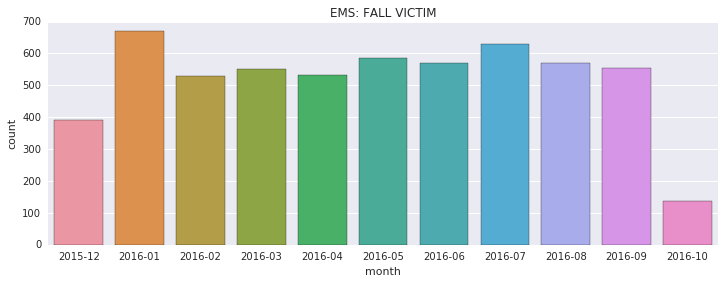

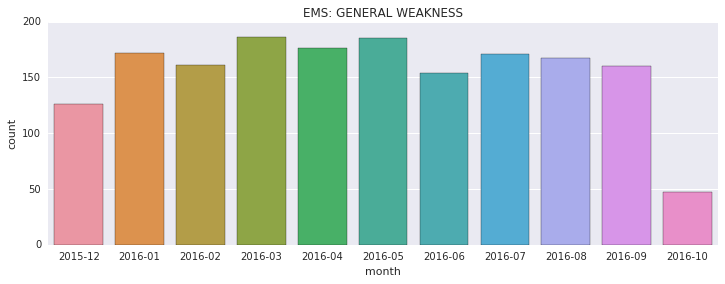

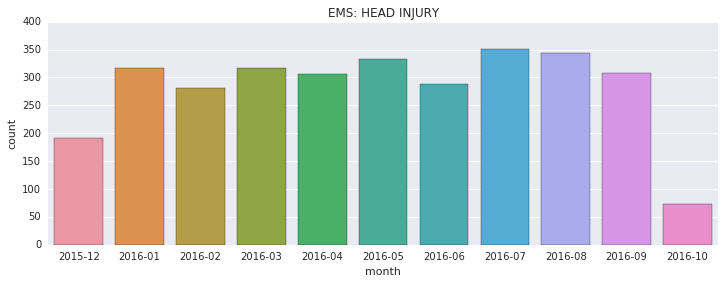

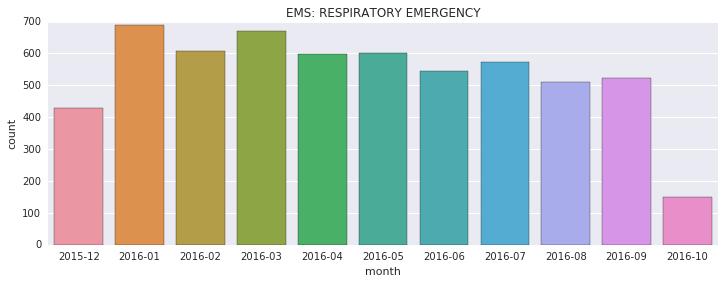

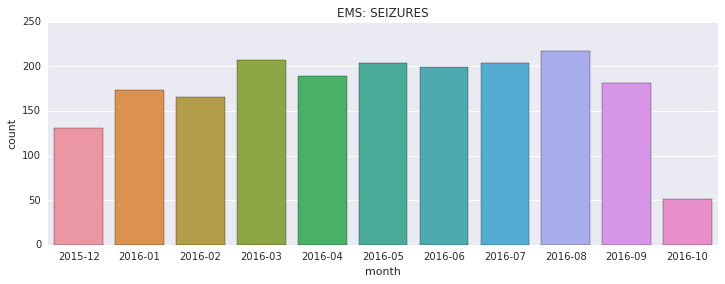

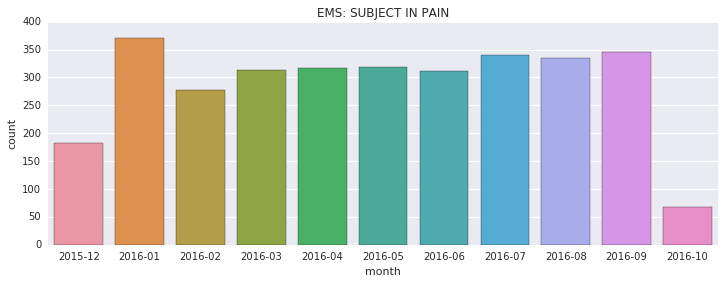

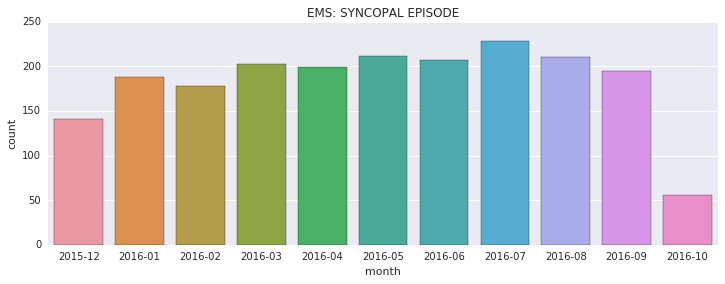

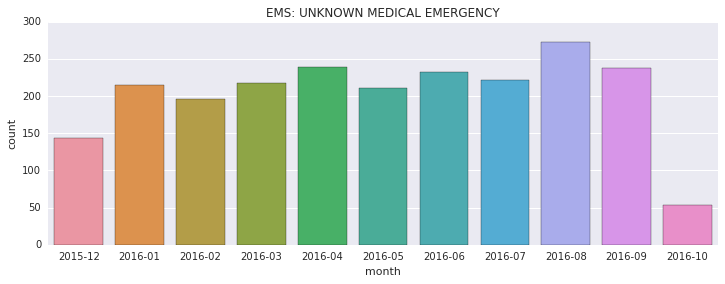

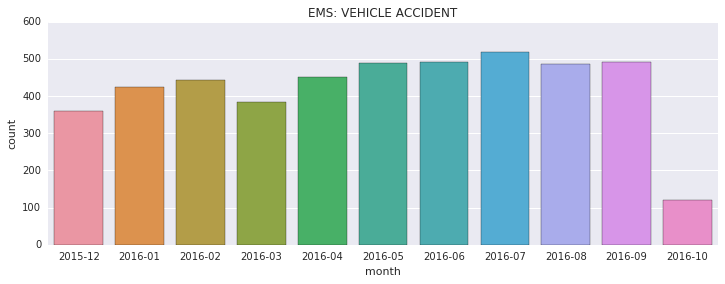

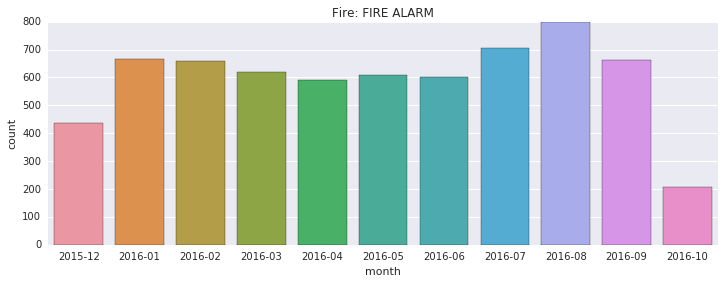

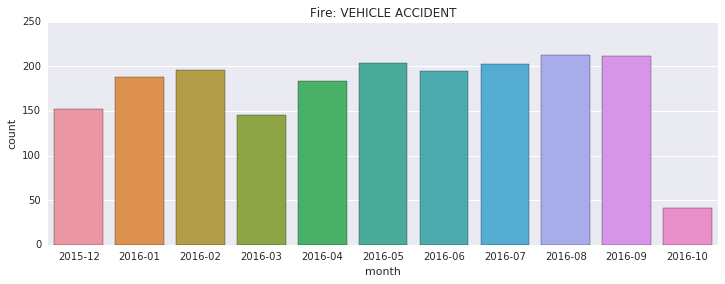

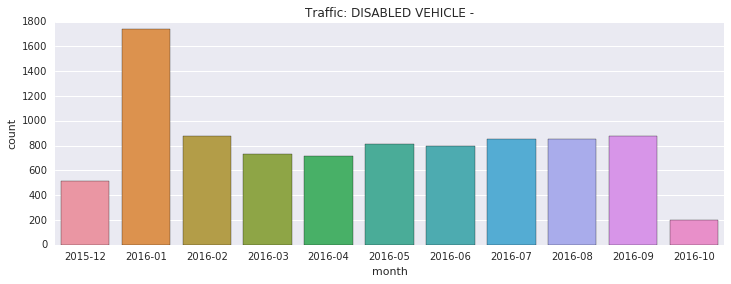

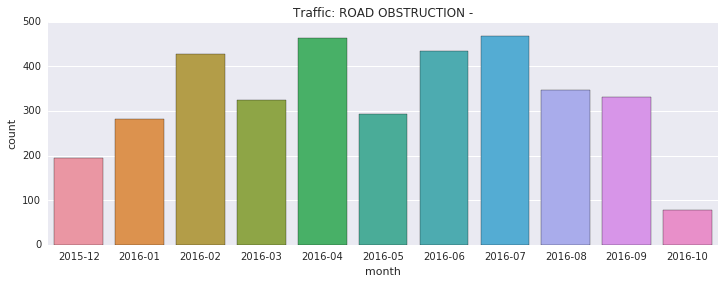

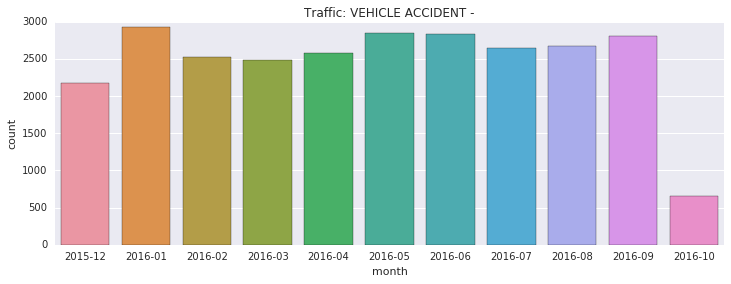

In [12]:
for i in range(reason.size):
    if new_data[i][:,2].size > 1700:
        sns.plt.figure(figsize=(12,4))
        sns.plt.title(new_data[i][0][-2])
        sns.plt.xlabel("month")
        sns.plt.ylabel(new_data[i][0][-2])
        sns.countplot(new_data[i][:,2])

In [13]:
all_ = np.zeros(df["timeStamp"].values.size,dtype='O')
for i in range(all_.size):
    all_[i] = df['timeStamp'].values[i][:7]

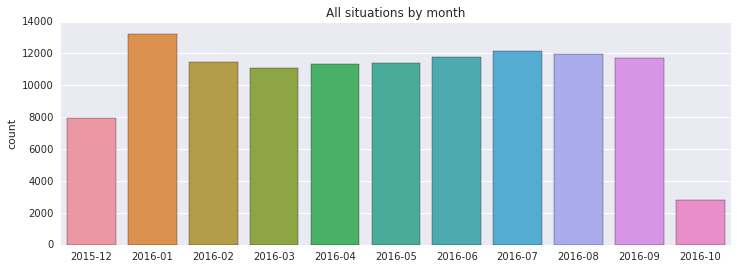

In [14]:
sns.plt.figure(figsize=(12,4))
sns.plt.title("All situations by month")
sns.countplot(all_)

In [15]:
all_ = np.zeros(df["timeStamp"].values.size,dtype='O')
for i in range(all_.size):
    all_[i] = df['timeStamp'].values[i][:10]

In [16]:
for i in range(all_.size):
    w = np.array(all_[i].split('-')).astype(int)
    all_[i] = week[calendar.weekday(w[0],w[1],w[2])]

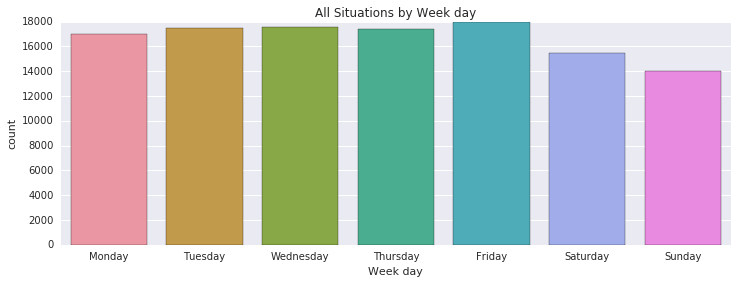

In [17]:
sns.plt.figure(figsize=(12,4))
sns.plt.xlabel("Week day")
sns.plt.title("All Situations by Week day")
sns.countplot(all_,order = week)

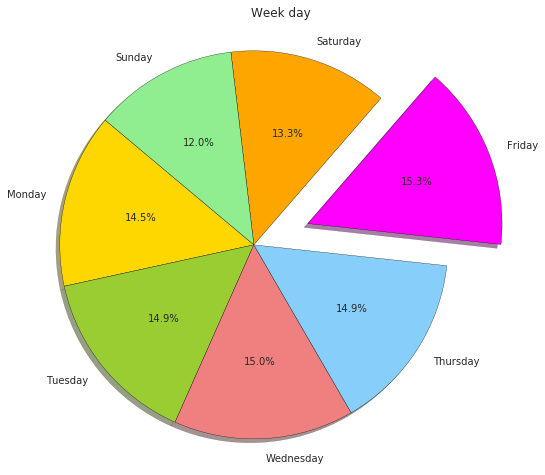

In [18]:
labels = "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"
sizes = [np.sum(all_ == "Monday"),np.sum(all_ == "Tuesday"),np.sum(all_ == "Wednesday"),np.sum(all_ == "Thursday"),np.sum(all_ == "Friday"),\
         np.sum(all_ == "Saturday"),np.sum(all_ == "Sunday")]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','magenta','orange','lightgreen']
explode = (0, 0, 0, 0, 0.3, 0, 0)  # explode 1st slice
plt.figure(figsize=(8,8))
# Plot
plt.title('Week day')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [19]:
all_ = np.zeros(df["timeStamp"].values.size,dtype='O')
for i in range(all_.size):
    h = np.array(df['timeStamp'].values[i][11:].split(":")).astype(int)
    all_[i] = (h[0] * 3600 + h[1] * 60 + h[2])/3600

In [20]:
all_ = all_.astype(int)

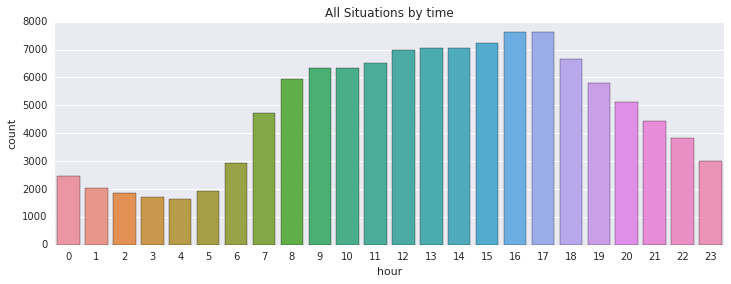

In [21]:
sns.plt.figure(figsize=(12,4))
sns.plt.xlabel("hour")
sns.plt.title("All Situations by time")
sns.countplot(all_)

In [22]:
city = list()
d = set()
for i in range(all_.size):
    city.append(df['twp'].values[i])
    d.add(city[i])
d.discard(np.nan)
for i in range(all_.size):
    if df['twp'].values[i] in d:
        city.append(df['twp'].values[i])

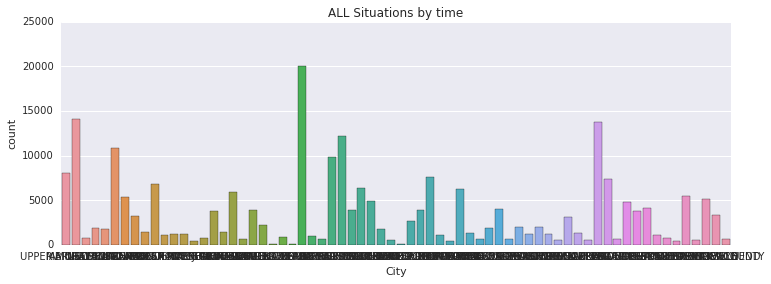

In [23]:
sns.plt.figure(figsize=(12,4))
sns.plt.xlabel("City")
sns.plt.title("ALL Situations by time")
sns.countplot(city,order = d) #alphabet order

In [24]:
d

{'ABINGTON',
 'AMBLER',
 'BERKS COUNTY',
 'BRIDGEPORT',
 'BRYN ATHYN',
 'BUCKS COUNTY',
 'CHELTENHAM',
 'CHESTER COUNTY',
 'COLLEGEVILLE',
 'CONSHOHOCKEN',
 'DELAWARE COUNTY',
 'DOUGLASS',
 'EAST GREENVILLE',
 'EAST NORRITON',
 'FRANCONIA',
 'GREEN LANE',
 'HATBORO',
 'HATFIELD BORO',
 'HATFIELD TOWNSHIP',
 'HORSHAM',
 'JENKINTOWN',
 'LANSDALE',
 'LEHIGH COUNTY',
 'LIMERICK',
 'LOWER FREDERICK',
 'LOWER GWYNEDD',
 'LOWER MERION',
 'LOWER MORELAND',
 'LOWER POTTSGROVE',
 'LOWER PROVIDENCE',
 'LOWER SALFORD',
 'MARLBOROUGH',
 'MONTGOMERY',
 'NARBERTH',
 'NEW HANOVER',
 'NORRISTOWN',
 'NORTH WALES',
 'PENNSBURG',
 'PERKIOMEN',
 'PHILA COUNTY',
 'PLYMOUTH',
 'POTTSTOWN',
 'RED HILL',
 'ROCKLEDGE',
 'ROYERSFORD',
 'SALFORD',
 'SCHWENKSVILLE',
 'SKIPPACK',
 'SOUDERTON',
 'SPRINGFIELD',
 'TELFORD',
 'TOWAMENCIN',
 'TRAPPE',
 'UPPER DUBLIN',
 'UPPER FREDERICK',
 'UPPER GWYNEDD',
 'UPPER HANOVER',
 'UPPER MERION',
 'UPPER MORELAND',
 'UPPER POTTSGROVE',
 'UPPER PROVIDENCE',
 'UPPER SALFORD',
 '

In [25]:
TIME = np.zeros(all_.size, dtype = "O")
for i in range(all_.size):
    for j in range(len(df['desc'][i])):
        if df['desc'][i][j] == ':':
            TIME[i] = (df['desc'][i][j-2:j+6])
            break
idx = []
for i in range(TIME.size):
    try:
        TIME[i] = (int((TIME[i]).split(':')[0])*3600 + int((TIME[i]).split(':')[1])*60 + int((TIME[i]).split(':')[2]))/3600
    except:
        TIME[i] = DATA[i,3]
diff = np.zeros(all_.size)
for i in range(all_.size):
    diff[i] = min(np.abs(DATA[i,3] - TIME[i]),24 - np.abs(DATA[i,3] - TIME[i]))

I noticed that we have difference between time in Description of incident and timeStump. So below you can see plot, which shows this difference.

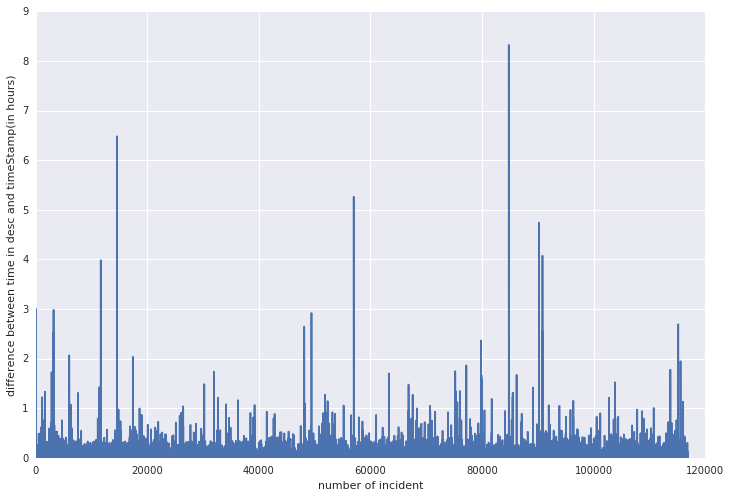

In [26]:
plt.figure(figsize=(12,8))
plt.ylabel("difference between time in desc and timeStamp(in hours)")
plt.xlabel("number of incident")
plt.plot(diff)

In general, on the plot above this difference belongs to the segment [0,1]. But there are some cases, where this difference is 3,4,5,6 and even 8 hours.

In [27]:
number_ = np.zeros(reason.size)
for i in range(number_.size):
    number_[i] = new_data[i].shape[0]

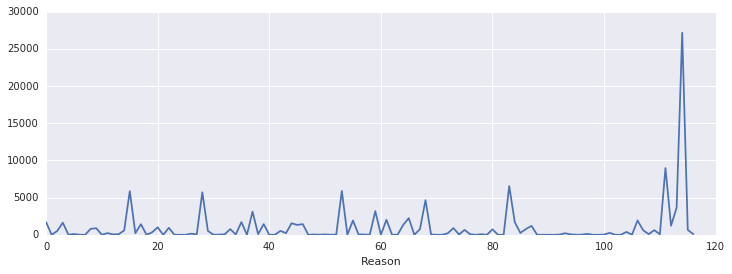

In [28]:
plt.figure(figsize=(12,4))
plt.xlabel("Reason")
plt.plot(number_)

In [29]:
data_matrix = []
for i in range(reason.size):
    data_matrix.append(tuple([np.hstack((reason.reshape(-1,1),number_.reshape(-1,1).astype(int)))][0][i]))

In [30]:
dtype = [('name', 'S80'), ('number', int)]
a = np.array(data_matrix,dtype=dtype)
sorted_a = np.sort(a, order='number')  
sorted_a = sorted_a[::-1]

In [31]:
data_matrix = [['reason','number of incidents']]
for i in range(reason.size):
    data_matrix.append([str(sorted_a[i][0])[2:-1],int((sorted_a[i][1]))])

The table below shows us that Vehicle Accident is the most common reason of 911-calls.

In [32]:
pd.DataFrame(data_matrix)

,0,1
0,reason,number of incidents
1,Traffic: VEHICLE ACCIDENT -,27147
2,Traffic: DISABLED VEHICLE -,8976
3,Fire: FIRE ALARM,6552
4,EMS: RESPIRATORY EMERGENCY,5901
5,EMS: CARDIAC EMERGENCY,5870
6,EMS: FALL VICTIM,5717
7,EMS: VEHICLE ACCIDENT,4660
8,Traffic: ROAD OBSTRUCTION -,3644
9,EMS: SUBJECT IN PAIN,3177


In [33]:
type_of_reason_ = np.zeros(DATA.shape[0],dtype='O')
for i in range(type_of_reason_.size):
    type_of_reason_[i] = DATA[i][4].split(' ')[0][:-1]

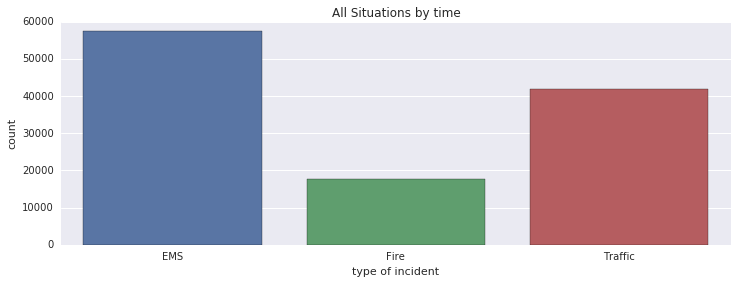

In [34]:
sns.plt.figure(figsize=(12,4))
sns.plt.xlabel("type of incident")
sns.plt.title("All Situations by time")
sns.countplot(type_of_reason_)

As you can see on the plot above "emergency medical service" - calls exceeds other types of incidents.

In [35]:
Traffic = DATA[type_of_reason_ == 'Traffic']
EMS = DATA[type_of_reason_ == 'EMS']
Fire = DATA[type_of_reason_ == 'Fire']

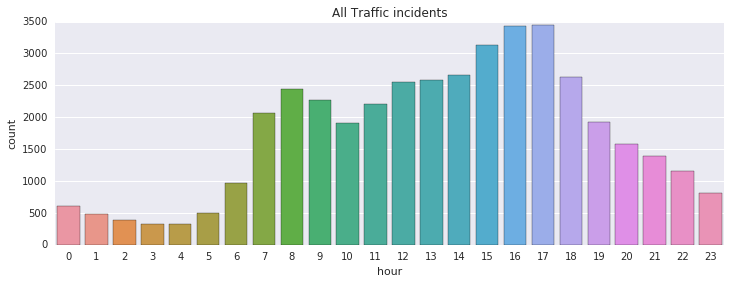

In [36]:
sns.plt.figure(figsize=(12,4))
sns.plt.xlabel("hour")
sns.plt.title("All Traffic incidents")
sns.countplot(Traffic[:,3].astype(int))

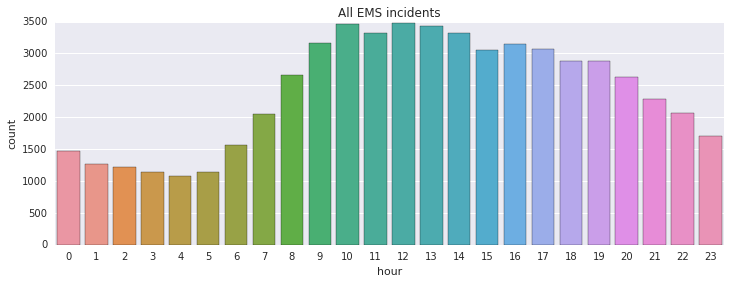

In [37]:
sns.plt.figure(figsize=(12,4))
sns.plt.xlabel("hour")
sns.plt.title("All EMS incidents")
sns.countplot(EMS[:,3].astype(int))

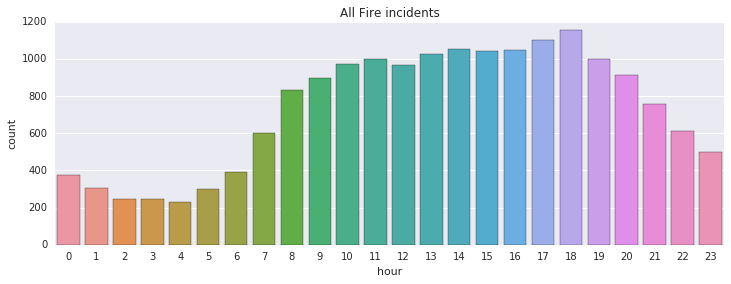

In [38]:
sns.plt.figure(figsize=(12,4))
sns.plt.xlabel("hour")
sns.plt.title("All Fire incidents")
sns.countplot(Fire[:,3].astype(int))

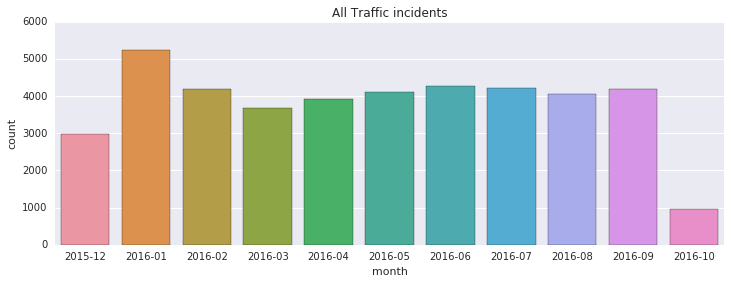

In [39]:
sns.plt.figure(figsize=(12,4))
sns.plt.xlabel("month")
sns.plt.title("All Traffic incidents")
sns.countplot(Traffic[:,2])

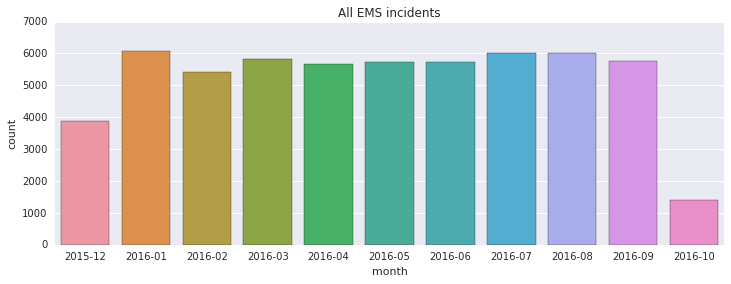

In [40]:
sns.plt.figure(figsize=(12,4))
sns.plt.xlabel("month")
sns.plt.title("All EMS incidents")
sns.countplot(EMS[:,2])

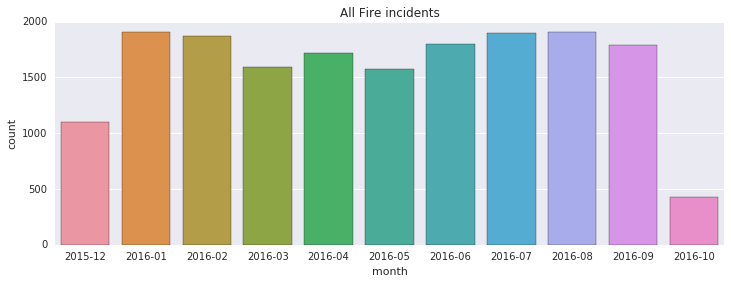

In [41]:
sns.plt.figure(figsize=(12,4))
sns.plt.xlabel("month")
sns.plt.title("All Fire incidents")
sns.countplot(Fire[:,2])

In [42]:
DATA = np.zeros((df.shape[0],6),dtype='O')
DATA[:,0] = df['lng'].values
DATA[:,1] = df['lat'].values
DATA[:,4] = df['title'].values
DATA[:,5] = df['twp'].values
for i in range(DATA.shape[0]):
    DATA[i,2] = df['timeStamp'].values[i][:10]
    DATA[i,3] = df['timeStamp'].values[i][10:]
    sp = DATA[i,3].split(':')
    DATA[i,3] = (int(sp[0])*3600 + int(sp[1])*60 + int(sp[2]))/3600
Traffic = DATA[type_of_reason_ == 'Traffic']
EMS = DATA[type_of_reason_ == 'EMS']
Fire = DATA[type_of_reason_ == 'Fire']

In [43]:
week_traffic = np.zeros(Traffic.shape[0],dtype = 'O')
for i in range(week_traffic.size):
    w = np.array(Traffic[i][2].split('-')).astype(int)
    week_traffic[i] = week[calendar.weekday(w[0],w[1],w[2])]

In [44]:
week_EMS = np.zeros(EMS.shape[0],dtype = 'O')
for i in range(week_EMS.size):
    w = np.array(EMS[i][2].split('-')).astype(int)
    week_EMS[i] = week[calendar.weekday(w[0],w[1],w[2])]

In [45]:
week_fire = np.zeros(Fire.shape[0],dtype = 'O')
for i in range(week_fire.size):
    w = np.array(Fire[i][2].split('-')).astype(int)
    week_fire[i] = week[calendar.weekday(w[0],w[1],w[2])]

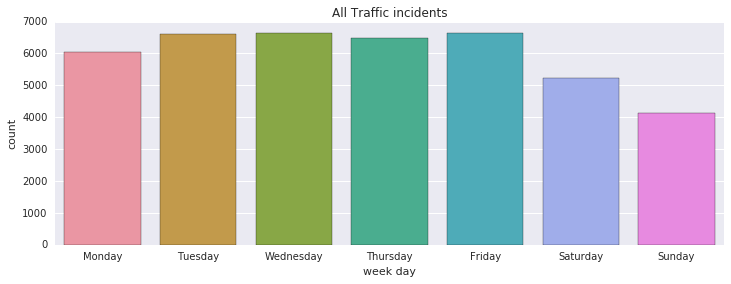

In [46]:
sns.plt.figure(figsize=(12,4))
sns.plt.xlabel("week day")
sns.plt.title("All Traffic incidents")
sns.countplot(week_traffic,order=week)

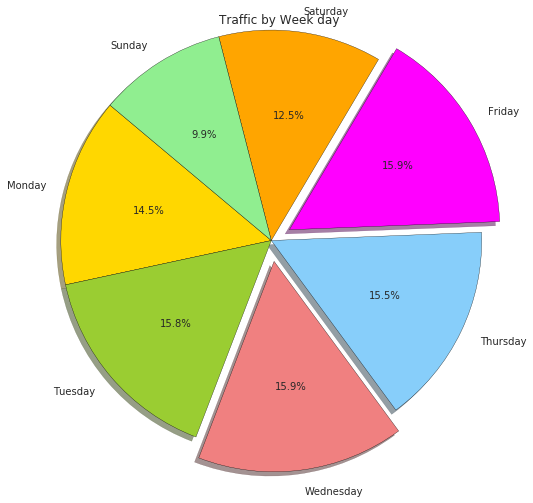

In [47]:
all_ = week_traffic
labels = "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"
sizes = [np.sum(all_ == "Monday"),np.sum(all_ == "Tuesday"),np.sum(all_ == "Wednesday"),np.sum(all_ == "Thursday"),np.sum(all_ == "Friday"),\
         np.sum(all_ == "Saturday"),np.sum(all_ == "Sunday")]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','magenta','orange','lightgreen']
explode = (0, 0, 0.1, 0, 0.1, 0, 0)  # explode 1st slice
plt.figure(figsize=(8,8))
# Plot
plt.title('Traffic by Week day')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

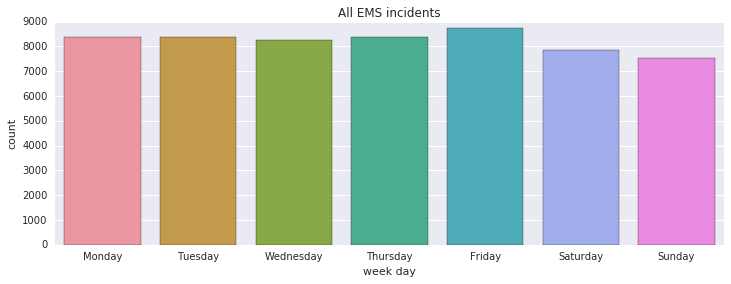

In [48]:
sns.plt.figure(figsize=(12,4))
sns.plt.xlabel("week day")
sns.plt.title("All EMS incidents")
sns.countplot(week_EMS,order=week)

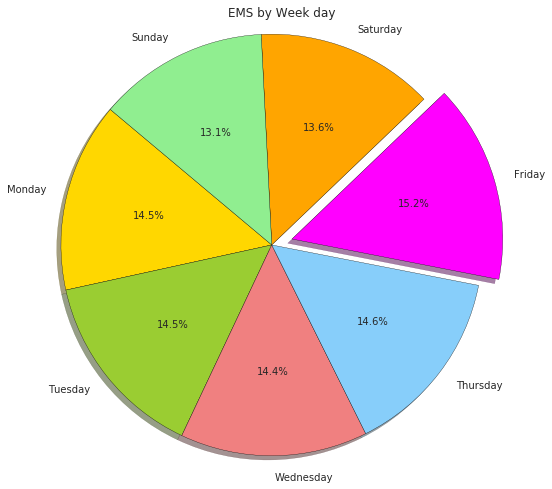

In [49]:
all_ = week_EMS
labels = "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"
sizes = [np.sum(all_ == "Monday"),np.sum(all_ == "Tuesday"),np.sum(all_ == "Wednesday"),np.sum(all_ == "Thursday"),np.sum(all_ == "Friday"),\
         np.sum(all_ == "Saturday"),np.sum(all_ == "Sunday")]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','magenta','orange','lightgreen']
explode = (0, 0, 0, 0, 0.1, 0, 0)  # explode 1st slice
plt.figure(figsize=(8,8))
# Plot
plt.title('EMS by Week day')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

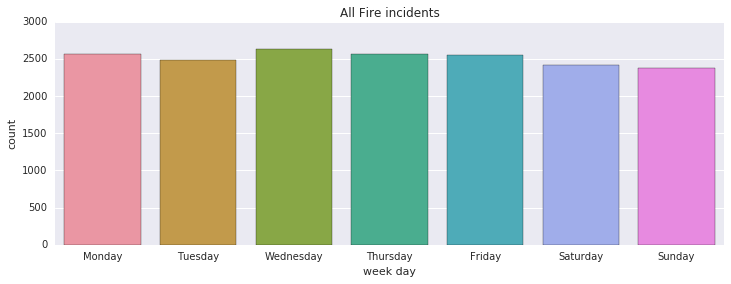

In [50]:
sns.plt.figure(figsize=(12,4))
sns.plt.xlabel("week day")
sns.plt.title("All Fire incidents")
sns.countplot(week_fire,order=week)

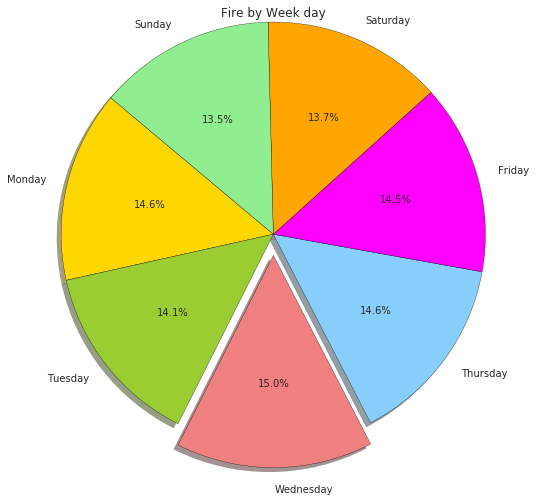

In [51]:
all_ = week_fire
labels = "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"
sizes = [np.sum(all_ == "Monday"),np.sum(all_ == "Tuesday"),np.sum(all_ == "Wednesday"),np.sum(all_ == "Thursday"),np.sum(all_ == "Friday"),\
         np.sum(all_ == "Saturday"),np.sum(all_ == "Sunday")]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','magenta','orange','lightgreen']
explode = (0, 0, 0.1, 0, 0., 0, 0)  # explode 1st slice
plt.figure(figsize=(8,8))
# Plot
plt.title('Fire by Week day')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [52]:
CITY = np.unique((city))
city = np.array(city)

In [53]:
CITY_matrix = []
for i in range(CITY.size - 1):
    CITY_matrix.append(tuple((CITY[i],np.sum(city == CITY[i]))))

In [54]:
dtype = [('name', 'S80'), ('number', int)]
a = np.array(CITY_matrix,dtype=dtype)
sorted_a = np.sort(a, order='number')  
sorted_a = sorted_a[::-1]

In [55]:
CITY_matrix = [['Township','number of incidents']]
for i in range(CITY.size-1):
    CITY_matrix.append([str(sorted_a[i][0])[2:-1],int((sorted_a[i][1]))])

In [56]:
pd.DataFrame(CITY_matrix)

,0,1
0,Township,number of incidents
1,LOWER MERION,20020
2,ABINGTON,14120
3,NORRISTOWN,13728
4,UPPER MERION,12200
5,CHELTENHAM,10822
6,POTTSTOWN,9856
7,UPPER MORELAND,8068
8,LOWER PROVIDENCE,7582
9,PLYMOUTH,7392


So, let's summarize all our results. When we see our results on separated plots we can understand which time is the most common for definite reason, which day of week, month. The majority of Traffic incidents most popular at 16:00 and 17:00, EMS - from 10:00 till 13:00, Fire - 18:00. Also we can see, that Sunday is the most calm week day.
Also, in the table above we can see locations in Pennsylvania and number of incidents. According to this information, we can see which townships in  Pennsylvania  are bigger and more developed. 
There are a lot of plots in this notebook, and I didn'tin  describe all of them and it is not necessary, because if you see these plots, you'll understand everything.

Thanks for attention! =)